Беляева Любовь Андреевна 19-ИВТ-2
6-вариант

Лабораторная работа №3

In [1]:

from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                            average_precision_score)

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных.

date - дата;
Temperature -температура;
Humidity - влажность;
Light - cвет;
CO2 - CO2;
HumidityRatio - влажность воздуха;
Occupancy - занятость;

2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [2]:
import numpy as np 

In [3]:
import pandas as pd
%matplotlib inline

In [4]:
pass_data1 = pd.read_csv('datatraining.csv')
pass_data1

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [5]:
#pass_data2 = pd.read_csv('titanic.csv')
#pass_data2

In [6]:
pass_data1.shape

(8143, 7)

In [7]:
pass_data1.drop_duplicates()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [8]:
pass_data1.shape

(8143, 7)

3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

<AxesSubplot:>

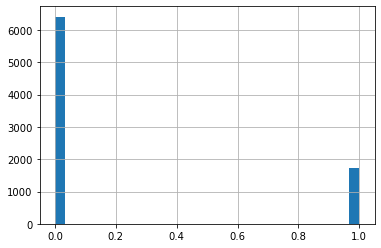

In [10]:
pass_data1.Occupancy.hist(bins=30)

Соотношение количество элементов заметно отличается, поэтому будем считать, что классы несбалансированы. 

4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

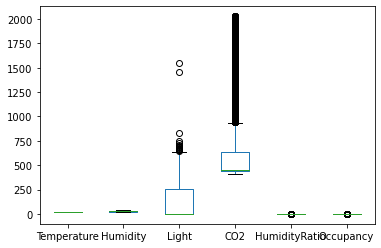

In [11]:
import seaborn as sns
#sns.boxplot(x=DMC);
pass_data1.plot.box();

In [12]:

numerical_columns = [i for i in pass_data1.columns if pass_data1[i].dtype.name != 'object']
categorial_columns = [i for i in pass_data1.columns if pass_data1[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']
categorial:  ['date']


In [13]:
#def cast(obj):
#    if type(obj) == str:
#        return float(obj.replace(',', '.'))
#    else:
#        return obj
#pass_data1['date'] = pass_data1['date'].apply(lambda x: cast(x))

In [14]:
#нормализация количественных признаков
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
pass_data1[numerical_columns] = scaler.fit_transform(pass_data1[numerical_columns])

pass_data1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,1.000000,0.470533,0.275490,0.190933,0.557318,1.0
2,2015-02-04 17:51:59,0.992823,0.470332,0.277754,0.186446,0.554807,1.0
3,2015-02-04 17:53:00,0.992823,0.469326,0.275490,0.186136,0.553761,1.0
4,2015-02-04 17:54:00,0.992823,0.467315,0.275490,0.182887,0.551669,1.0
5,2015-02-04 17:55:00,0.980861,0.467315,0.275490,0.180566,0.547851,1.0


Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются

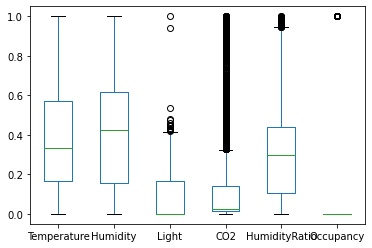

In [15]:
pass_data1.plot.box();

5.Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [17]:
pass_data1.nunique()

date             8143
Temperature       265
Humidity         1325
Light             889
CO2              2282
HumidityRatio    3583
Occupancy           2
dtype: int64

In [18]:

for i in categorial_columns:
    print(i,': ', pass_data1[i].unique())

date :  ['2015-02-04 17:51:00' '2015-02-04 17:51:59' '2015-02-04 17:53:00' ...
 '2015-02-10 09:30:59' '2015-02-10 09:32:00' '2015-02-10 09:33:00']


In [19]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder() 
pass_data1['date'] = lb_make.fit_transform(pass_data1['Temperature'])
pass_data1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,264,1.000000,0.470533,0.275490,0.190933,0.557318,1.0
2,263,0.992823,0.470332,0.277754,0.186446,0.554807,1.0
3,263,0.992823,0.469326,0.275490,0.186136,0.553761,1.0
4,263,0.992823,0.467315,0.275490,0.182887,0.551669,1.0
5,262,0.980861,0.467315,0.275490,0.180566,0.547851,1.0


6.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

<AxesSubplot:>

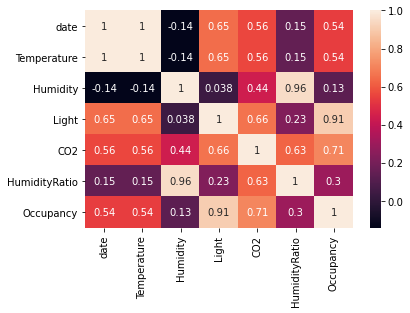

In [20]:

sns.heatmap(pass_data1.corr(),annot=True)#функция для отображения коэффициента корреляции

7.Заполните пропущенные значения в данных;

In [21]:
pass_data1.isnull()#отсутствие данных

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
8139,False,False,False,False,False,False,False
8140,False,False,False,False,False,False,False
8141,False,False,False,False,False,False,False
8142,False,False,False,False,False,False,False


In [22]:

pass_data1.shape

(8143, 7)

In [23]:

pass_data1.count()#пропусков нет

date             8143
Temperature      8143
Humidity         8143
Light            8143
CO2              8143
HumidityRatio    8143
Occupancy        8143
dtype: int64

8.Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

In [25]:

import numpy as np
import sklearn as skl
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
X = pass_data1.drop(['Occupancy'], axis=1)#признаки
Y = pass_data1['Occupancy']#классы
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)#обучающиая выборка и тестовые выборки

In [27]:
KNN = KNeighborsClassifier()#классификатор

search = GridSearchCV(KNN, {'n_neighbors': range (1,55)})#ищем подходящие параметры кол- во соседей выбираем соседей для точной классификации 
search.fit(X_train, Y_train)#заносим x и y чтобы максимально совпадали

n = search.best_estimator_.n_neighbors#наилучший результат кол - ва соседей

KNN = KNeighborsClassifier(n_neighbors = n)#в классификатор заносим кол-во соседей
KNN.fit(X_train, Y_train)#заносим обучающую выборку
print("Accuracy of KNN model:", accuracy_score(Y_test, KNN.predict(X_test)))
print('Best accuracy:', search.best_score_)


Accuracy of KNN model: 0.9733933688088416
Best accuracy: 0.9673684210526317


In [28]:
DTC = DecisionTreeClassifier()

DTC_grid = GridSearchCV(DTC, {'max_depth': list(range(1, 6)), 'max_features': list(range(1, 6))})
DTC_grid.fit (X_train, Y_train)

best_depth = DTC_grid.best_estimator_.max_depth # Находим лучшую глубину
best_features = DTC_grid.best_estimator_.max_features # Находим лучшее количество признаков, которые следует учитывать при поиске

DTC = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
DTC.fit(X_train, Y_train)

accuracy_score = np.mean(Y_test == DTC.predict(X_test))
print("Accuracy of DTC model:",  accuracy_score)
print("Best accuracy:", DTC_grid.best_score_)

Accuracy of DTC model: 0.978305362259517
Best accuracy: 0.9935087719298246


RP

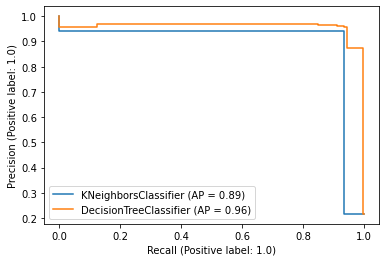

In [29]:
#полнота и точность
i = plot_precision_recall_curve(KNN, X_test, Y_test)
g = plot_precision_recall_curve(DTC, X_test, Y_test, ax = i.ax_)

ROC

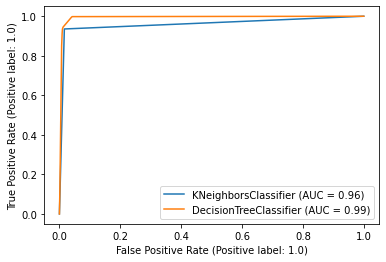

In [30]:
#доля правильных и доля неправильных
i = plot_roc_curve(KNN, X_test, Y_test)
g = plot_roc_curve(DTC, X_test, Y_test, ax = i.ax_)

9.Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Линейный классификатор(бинарное решающее дерево) и k ближайших соседей имеют примерно одинаковые показатели